In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\SUJITH CHARAN\OneDrive\Documents\KR\ml\datasets\dynamic_pricing.csv")
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Expected_Ride_Duration,Historical_Cost_of_Ride,count
0,90,45,Urban,13,4.47,Night,90.0,284.257273,NaN
1,58,39,Suburban,72,4.06,Evening,43.0,173.874753,NaN
2,42,31,Rural,0,3.99,Afternoon,76.0,329.795469,NaN
3,89,28,Rural,67,4.31,Afternoon,134.0,470.201232,NaN
4,78,22,Rural,74,3.77,Afternoon,149.0,579.681422,NaN
...,...,...,...,...,...,...,...,...,...
996,84,29,Urban,92,4.55,Morning,94.0,424.155987,NaN
997,44,6,Suburban,80,4.13,Night,40.0,157.364830,NaN
998,53,27,Suburban,78,3.63,Night,58.0,279.095048,NaN
999,78,63,Rural,14,4.21,Afternoon,147.0,655.065105,NaN


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\SUJITH CHARAN\OneDrive\Documents\KR\ml\datasets\dynamic_pricing.csv")
data = pd.DataFrame(data = df, columns = df.columns)
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


***There are cases where the economy and premium classes are no differentiable. As there are more premium cars in rural and more economy cars in urban areas so i would like to remove the vehicle_type class from the features***

In [6]:
draft_1 = data.drop("Vehicle_Type",axis = 1)
draft_1["z_score"] = stats.zscore(draft_1["Average_Ratings"])
outliers = draft_1[draft_1["z_score"].abs() > 3]
outliers

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Expected_Ride_Duration,Historical_Cost_of_Ride,z_score


***as we can see there are no outliers in the average rating through z_score***
***which is one of the important feature***

In [7]:
Q1 = draft_1["Average_Ratings"].quantile(0.25)
Q3 = draft_1["Average_Ratings"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Average_Ratings"] < lower_bound) | (df["Average_Ratings"] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []


***this method is called IQR method even though we don't have any outliers***

***As you can see in the 2nd row of the data, we can see there is no past rides and it is a rural area. we also found the vehicle_type as premimum and the cost of ride is above 300. so i will remove this whole row to make the algorithm more efficient***

In [8]:
draft_2 = draft_1.drop(2)
draft_2

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Expected_Ride_Duration,Historical_Cost_of_Ride,z_score
0,90,45,Urban,Silver,13,4.47,Night,90,284.257273,0.488517
1,58,39,Suburban,Silver,72,4.06,Evening,43,173.874753,-0.452793
3,89,28,Rural,Regular,67,4.31,Afternoon,134,470.201232,0.121177
4,78,22,Rural,Regular,74,3.77,Afternoon,149,579.681422,-1.118598
5,59,35,Urban,Silver,83,3.51,Night,128,339.955361,-1.715527
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,11,91.389526,-0.108411
996,84,29,Urban,Regular,92,4.55,Morning,94,424.155987,0.672188
997,44,6,Suburban,Gold,80,4.13,Night,40,157.364830,-0.292082
998,53,27,Suburban,Regular,78,3.63,Night,58,279.095048,-1.440022


In [9]:
draft_2["z_score"] = stats.zscore(draft_2["Historical_Cost_of_Ride"])
outliers_2 = draft_2[draft_2["z_score"].abs() > 3]
outliers_2

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Expected_Ride_Duration,Historical_Cost_of_Ride,z_score


In [10]:
Q1 = draft_2["Average_Ratings"].quantile(0.25)
Q3 = draft_2["Average_Ratings"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Average_Ratings"] < lower_bound) | (df["Average_Ratings"] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []


***as we can see there are no abnormalities in the cost price data in the dataframe***

In [11]:
indices_to_drop = draft_2[draft_2["Number_of_Past_Rides"] == 0 ].index
indices_to_drop
draft_3 = draft_2.drop(indices_to_drop)

In [12]:
draft_3["z_score"] = stats.zscore(draft_3["Expected_Ride_Duration"])
outliers_3 = draft_3[draft_3["z_score"].abs() > 3]
outliers_3

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Expected_Ride_Duration,Historical_Cost_of_Ride,z_score


In [13]:
Q1 = draft_3["Expected_Ride_Duration"].quantile(0.25)
Q3 = draft_3["Expected_Ride_Duration"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Average_Ratings"] < lower_bound) | (df["Average_Ratings"] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []


In [14]:

draft_4 = draft_3.drop(["Location_Category","Customer_Loyalty_Status","Time_of_Booking","z_score"],axis = 1)
X = draft_4.iloc[:,:-1]
y = draft_4.iloc[:,-1]
draft_4 #final draft


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,13,4.47,90,284.257273
1,58,39,72,4.06,43,173.874753
3,89,28,67,4.31,134,470.201232
4,78,22,74,3.77,149,579.681422
5,59,35,83,3.51,128,339.955361
...,...,...,...,...,...,...
995,33,23,24,4.21,11,91.389526
996,84,29,92,4.55,94,424.155987
997,44,6,80,4.13,40,157.364830
998,53,27,78,3.63,58,279.095048


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred  = lin_reg.predict(X_test)
X_test.iloc[:,0].shape
y_pred.shape

(198,)

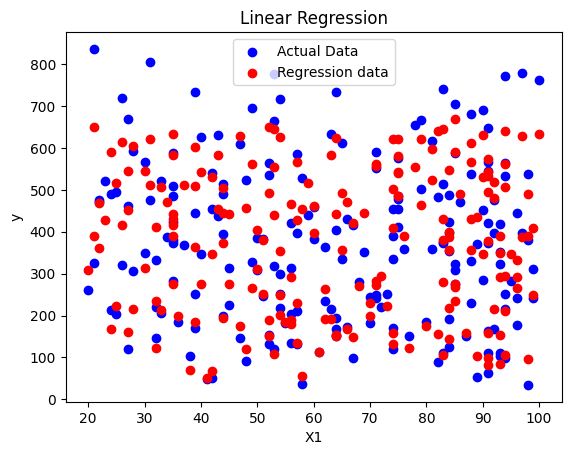

In [18]:
# Resetting the index of X_test for consistent indexing
X_test_reset = X_test.reset_index(drop=True)

# Scatter plot with regression line
plt.scatter(X_test_reset.iloc[:, 0], y_test, color="blue", label="Actual Data")
plt.scatter(X_test_reset.iloc[:, 0], y_pred, color="red", label="Regression data")
plt.title("Linear Regression")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()


In [19]:
print("accuracy/R^2",lin_reg.score(X,y))

accuracy/R^2 0.8624145885374158
